<b>Data Storytelling</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned.csv')

In [3]:
df.describe()

,Unnamed: 0,iyear,imonth,region,crit1,crit2,crit3,success,suicide,attacktype1,...,targtype3,individual,weaptype1,weaptype2,weaptype3,weaptype4,nkill,nwound,property,propextent
count,122376.000000,122376.000000,122376.000000,122376.000000,122376.000000,122376.000000,122376.000000,122376.000000,122376.000000,122376.000000,...,703.000000,122376.000000,122376.000000,8547.000000,1127.000000,63.000000,122376.000000,122376.000000,122376.000000,37549.000000
mean,61187.500000,2001.048792,6.483575,6.917876,0.986942,0.993561,0.884994,0.899114,0.030888,2.917819,...,9.853485,0.003105,5.870792,6.722008,6.815439,6.238095,2.068273,3.164714,0.629584,2.977842
std,35327.052608,12.858189,3.382071,2.939605,0.113524,0.079986,0.319031,0.301179,0.173016,1.512188,...,5.786553,0.055638,0.987989,2.127503,2.175189,1.455959,10.195089,38.632697,0.482918,0.148280
min,0.000000,1970.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,30593.750000,1990.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,...,3.000000,0.000000,5.000000,5.000000,5.000000,5.000000,0.000000,0.000000,0.000000,3.000000
50%,61187.500000,2006.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,...,14.000000,0.000000,6.000000,6.000000,6.000000,6.000000,0.000000,0.000000,1.000000,3.000000
75%,91781.250000,2013.000000,9.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,...,14.000000,0.000000,6.000000,8.000000,8.000000,6.000000,1.000000,2.000000,1.000000,3.000000
max,122375.000000,2016.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,...,22.000000,1.000000,12.000000,13.000000,13.000000,12.000000,1383.000000,7366.000000,1.000000,3.000000


In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

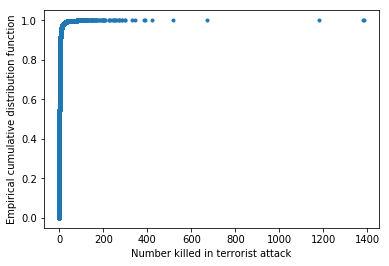

In [5]:
x, y = ecdf(df['nkill'])

_ = plt.plot(x,y, linestyle = 'none', marker = '.')
_ = plt.xlabel('Number killed in terrorist attack')
_ = plt.ylabel('Empirical cumulative distribution function')
plt.show()

In [6]:
df['success']

#df['success'].plot(kind='bar') 
#this doesn't work

0         1
1         0
2         1
3         1
4         1
5         0
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        0
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
122346    0
122347    1
122348    1
122349    1
122350    0
122351    1
122352    1
122353    0
122354    0
122355    1
122356    1
122357    1
122358    1
122359    0
122360    1
122361    1
122362    1
122363    1
122364    1
122365    0
122366    1
122367    1
122368    1
122369    1
122370    1
122371    1
122372    1
122373    1
122374    0
122375    0
Name: success, Length: 122376, dtype: int64

In [31]:
region_dict = {1: 'North America', 2: 'Central America', 3: 'South America', 4: 'East Asia', 5: 'SE Asia', 6: 'South Asia', 
7: 'Central Asia', 8: 'West Europe',9: 'East Europe',10: 'ME and North Africa', 
11: 'Sub-Saharan Africa', 12: 'Oceania'}

df['region_name'] = df['region'].replace(region_dict)

In [32]:
region_success_counts = df.groupby(['region_name'])['success'].sum()

region_counts = df.groupby(['region_name'])['success'].count()

In [33]:
print(region_counts)
print(region_success_counts)

region_name
Central America         7024
Central Asia             460
East Asia                668
East Europe             3496
ME and North Africa    30959
North America           2988
Oceania                  223
SE Asia                 8978
South America          14745
South Asia             30567
Sub-Saharan Africa      9751
West Europe            12517
Name: success, dtype: int64
region_name
Central America         6732
Central Asia             412
East Asia                555
East Europe             2958
ME and North Africa    27804
North America           2459
Oceania                  198
SE Asia                 8096
South America          13640
South Asia             27580
Sub-Saharan Africa      9086
West Europe            10510
Name: success, dtype: int64


In [34]:
region_success_ratio = region_success_counts.divide(region_counts)

print(region_success_ratio)

region_name
Central America        0.958428
Central Asia           0.895652
East Asia              0.830838
East Europe            0.846110
ME and North Africa    0.898091
North America          0.822959
Oceania                0.887892
SE Asia                0.901760
South America          0.925059
South Asia             0.902280
Sub-Saharan Africa     0.931802
West Europe            0.839658
Name: success, dtype: float64


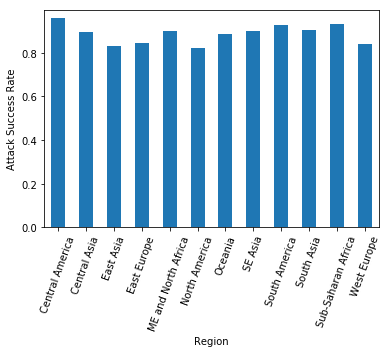

In [45]:
_ = region_success_ratio.plot(kind='bar', rot = 70)
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Success Rate')
plt.margins(0.04)
plt.show()

In [15]:
df['fatal'] = df['nkill'] > 0

#df['nkill'] > 0

In [19]:
df['fatal']

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
122346    False
122347    False
122348     True
122349     True
122350    False
122351     True
122352    False
122353    False
122354    False
122355     True
122356    False
122357     True
122358    False
122359    False
122360     True
122361    False
122362     True
122363    False
122364     True
122365    False
122366    False
122367     True
122368     True
122369     True
122370     True
122371     True
122372     True
122373     True
122374    False
122375    False
Name: fatal, Length: 122

In [46]:
region_fatal_counts = df.groupby(['region_name'])['fatal'].sum()

print(region_fatal_counts)

region_name
Central America         3166.0
Central Asia             235.0
East Asia                121.0
East Europe             1175.0
ME and North Africa    17168.0
North America            439.0
Oceania                   45.0
SE Asia                 4051.0
South America           5126.0
South Asia             16276.0
Sub-Saharan Africa      5690.0
West Europe             1950.0
Name: fatal, dtype: float64


In [51]:
region_fatal_ratio = region_fatal_counts.divide(region_counts)

print(region_fatal_ratio)

region_name
Central America        0.450740
Central Asia           0.510870
East Asia              0.181138
East Europe            0.336098
ME and North Africa    0.554540
North America          0.146921
Oceania                0.201794
SE Asia                0.451214
South America          0.347643
South Asia             0.532470
Sub-Saharan Africa     0.583530
West Europe            0.155788
dtype: float64


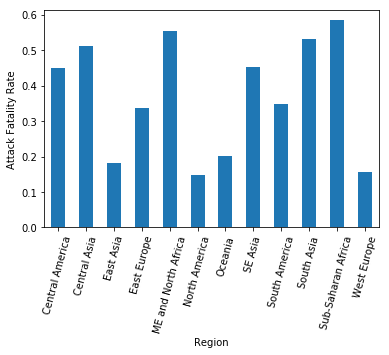

In [49]:
_ = region_fatal_ratio.plot(kind='bar', rot = 75)
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()

In [53]:
region_fatal_ratio = region_fatal_ratio.sort_values()

print(region_fatal_ratio)

region_name
North America          0.146921
West Europe            0.155788
East Asia              0.181138
Oceania                0.201794
East Europe            0.336098
South America          0.347643
Central America        0.450740
SE Asia                0.451214
Central Asia           0.510870
South Asia             0.532470
ME and North Africa    0.554540
Sub-Saharan Africa     0.583530
dtype: float64


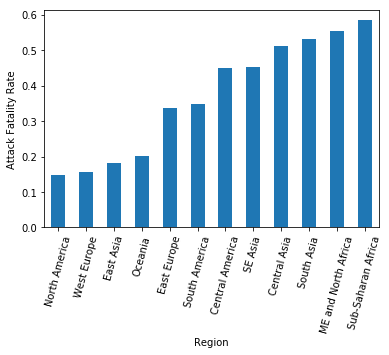

In [54]:
_ = region_fatal_ratio.plot(kind='bar', rot = 75)
_ = plt.xlabel('Region')
_ = plt.ylabel('Attack Fatality Rate')
plt.show()